# TP1: SERIES TEMPORELLES

Realised by RUDY TCHAMBA TCHAPTCHE ITIEL 21T2981

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
month = pd.read_csv("/home/redeus/Downloads/Month_Value_1.csv", index_col='Period', parse_dates=True)

In [3]:
month.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2015-01-01 to 2022-01-12
Data columns (total 4 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Revenue                                   64 non-null     float64
 1   Sales_quantity                            64 non-null     float64
 2   Average_cost                              64 non-null     float64
 3   The_average_annual_payroll_of_the_region  64 non-null     float64
dtypes: float64(4)
memory usage: 3.8 KB


In [4]:
month.head()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
Period,,,,
2015-01-01,1.601007e+07,12729.0,1257.763541,30024676.0
2015-01-02,1.580759e+07,11636.0,1358.507000,30024676.0
2015-01-03,2.204715e+07,15922.0,1384.697024,30024676.0
2015-01-04,1.881458e+07,15227.0,1235.606705,30024676.0
2015-01-05,1.402148e+07,8620.0,1626.621765,30024676.0


In [5]:
month.isna().sum()

Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [6]:
month = month.dropna()

In [7]:
month.isna().sum()

Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [8]:
month.shape

(64, 4)

### QUESTION 1

In [9]:
# la moyenne
np.mean(month['Revenue'])

32360452.25942575

In [10]:
# la Variance
np.std(month['Revenue'])**2

133406918096438.39

In [11]:
# l'ecartype
np.std(month['Revenue'])

11550191.258002544

In [12]:
month.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,6.400000e+01,64.000000,64.000000,6.400000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,1.164150e+07,6591.287257,296.844793,1.057191e+06
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.242655e+07,15065.500000,1499.142841,2.782857e+07
50%,3.209088e+07,18368.000000,1654.399798,2.819785e+07
75%,3.992999e+07,22856.250000,1916.401096,2.987852e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


### QUESTION 2

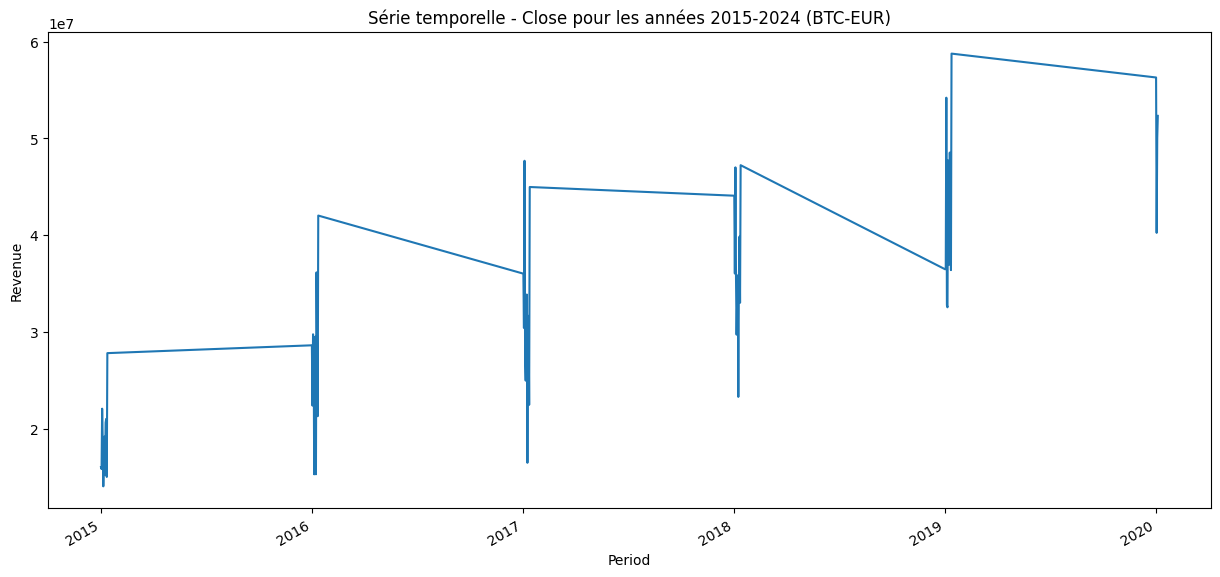

In [13]:
month['Revenue'].plot(figsize=(15, 7))
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.title('Série temporelle - Close pour les années 2015-2024 (BTC-EUR)')
plt.show()

### QUESTION 3

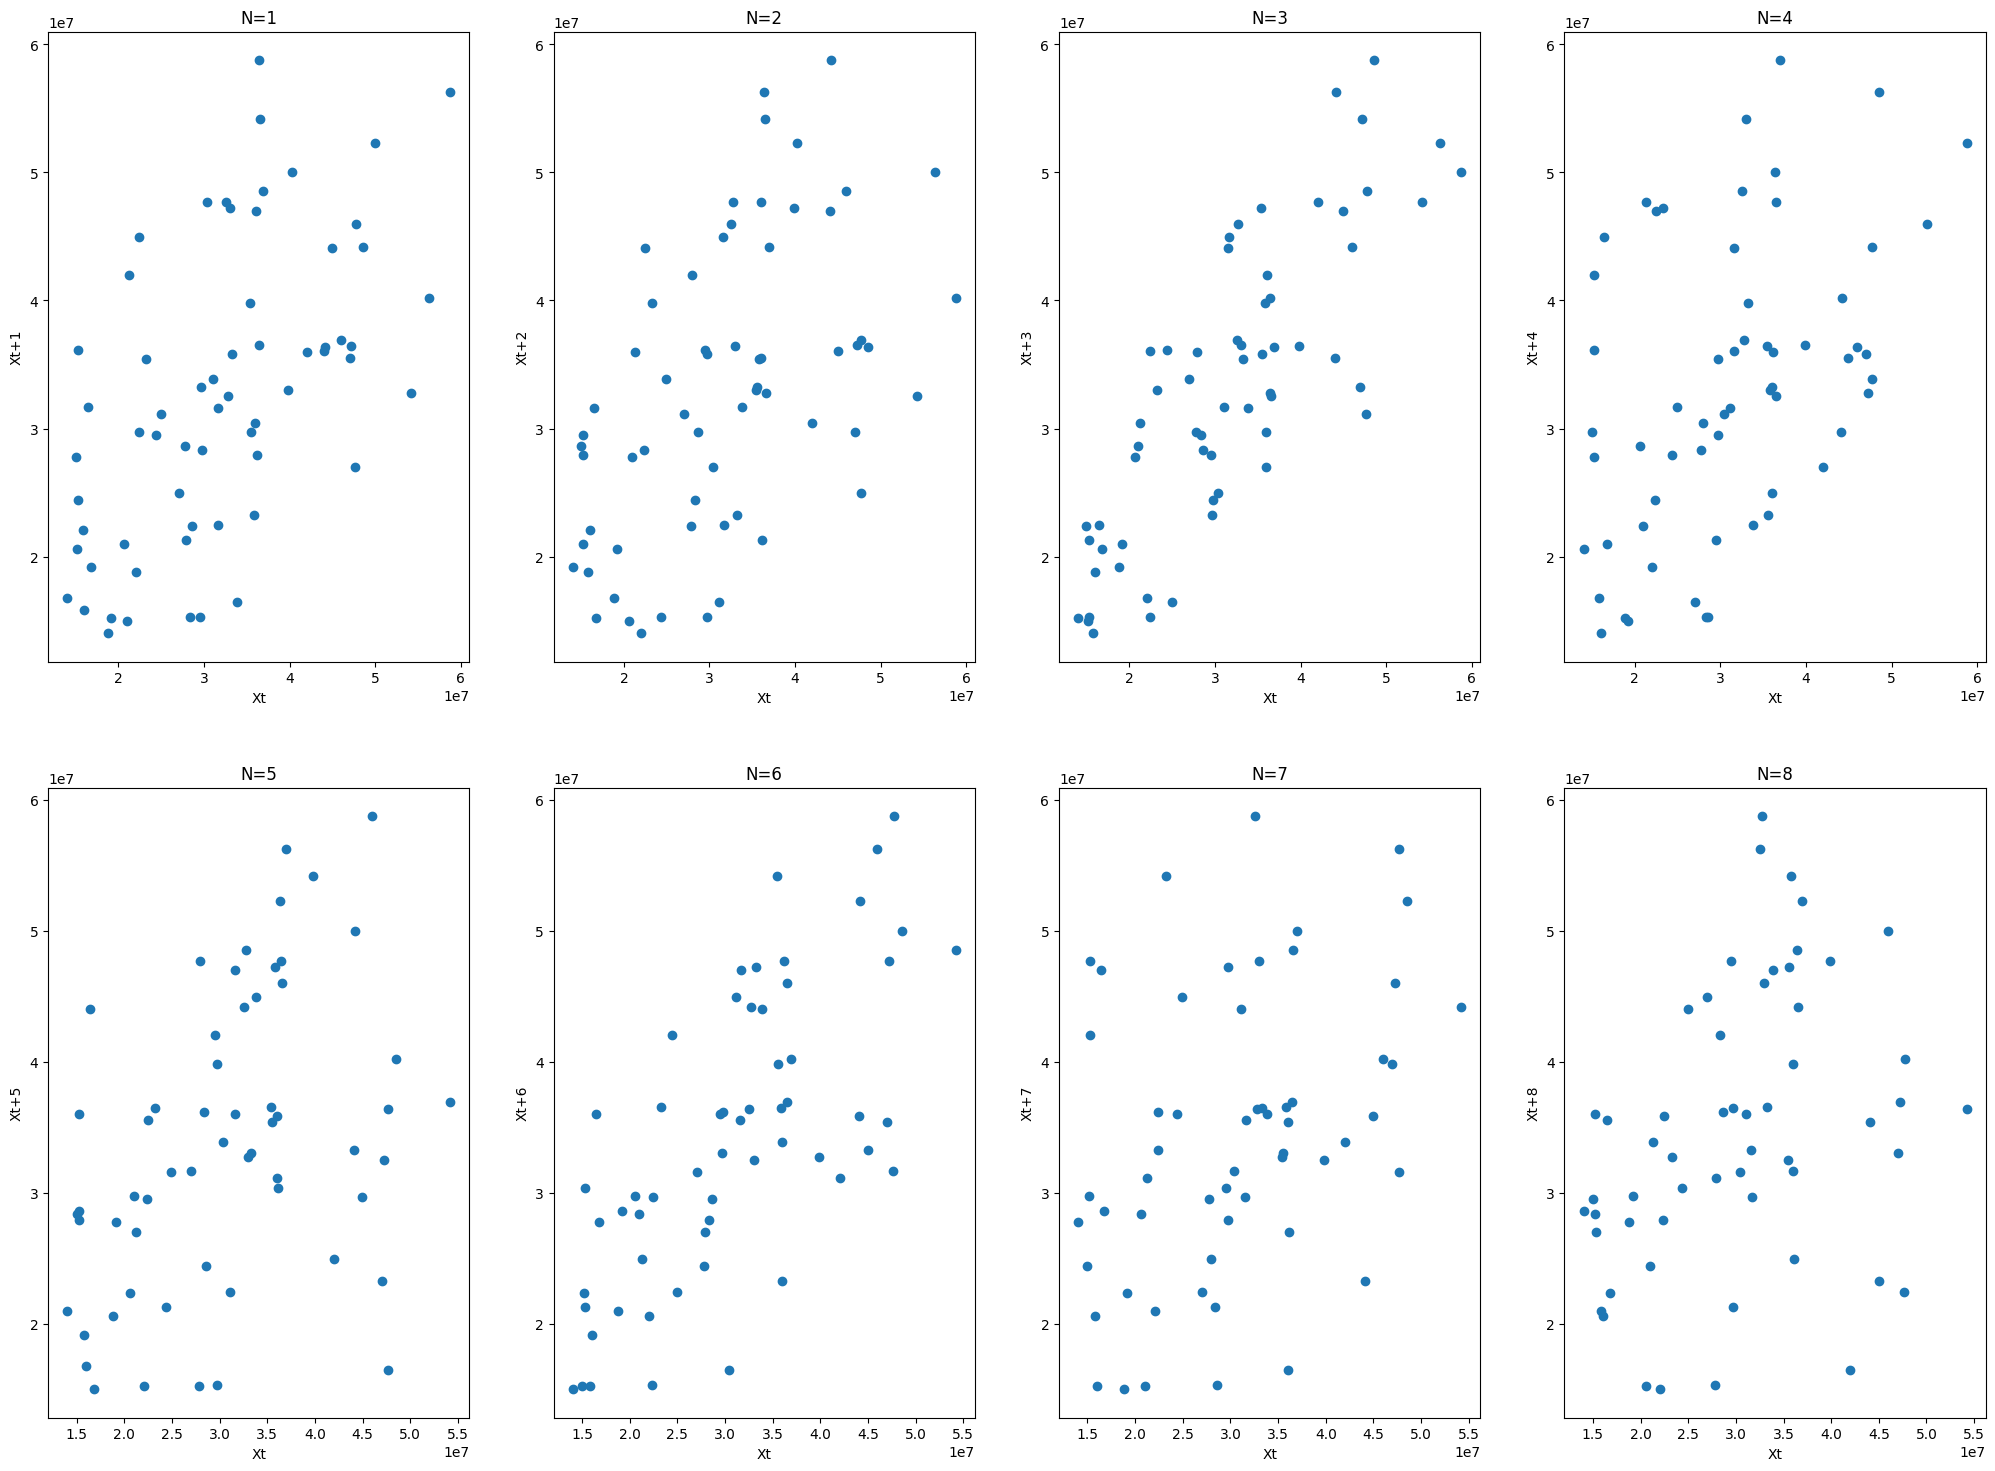

In [14]:
plt.figure(figsize=[25,18])
for N in range(1,9):
    plt.subplot(2,4,N)
    debut=0
    fin=64
    plt.scatter(month['Revenue'][debut:fin-N], month['Revenue'][debut+N:fin])
    plt.xlabel("Xt")
    plt.ylabel(f"Xt+{N}")
    plt.title(f"N={N}")
plt.show()

### QUESTION 4

In [15]:
#CALCUL DE L'AUTO-CONVARIANCE-EMPIRIQUE
def auto_cov(data, K, moy):
    debut=0
    fin=len(data)
    Xt=data[debut:fin-K]
    Xt_k=data[debut+K:fin]

    cov=0
    for i in range(fin-K):
        cov+=(Xt[i]-moy)*(Xt_k[i]-moy)
    return cov/(fin-K)

In [16]:
def auto_cor(data, K):
    moy=np.mean(data)
    cov_0=auto_cov(data, 0, moy)
    cov_K=auto_cov(data, K, moy)
    return cov_K/cov_0

In [17]:
from tqdm import tqdm
auto_cor_all=list()
data=list(month['Revenue'])
for i in tqdm(range(1, 49)):
    auto_cor_all.append(auto_cor(data, i))

100%|██████████| 48/48 [00:00<00:00, 7268.90it/s]


<BarContainer object of 48 artists>

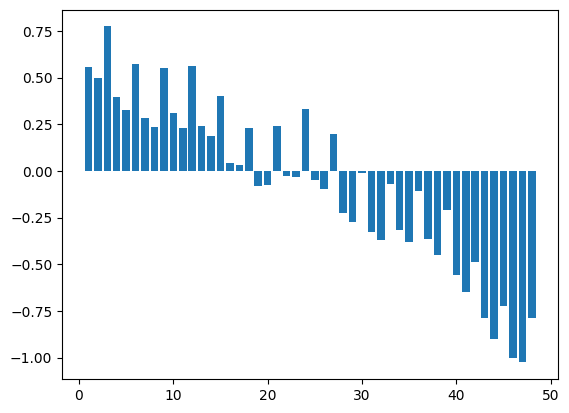

In [18]:
indexes=[i for i in range(1,49)]
plt.bar(indexes,auto_cor_all)